# eval counting

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from utils.load_env_vars import load_env

load_env()

from torch.utils.data import DataLoader
from data.dataloader import CyListSceneUnderstandingDataset, CyListVQADataset
from judge.judge_utils import query_sglang_llama3, query_sglang_llama3_batched
import json 
import re

from tqdm import tqdm

from judge.query_sglang import query_judge_batched 
from judge.metrics import compute_count_metrics
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

-----------------------------
Environment variables loaded:
HF_HOME /pfss/mlde/workspaces/mlde_wsp_PI_Kersting/LLaVA-cake/Cyclist/hfcache
HUGGINGFACE_HUB_CACHE /pfss/mlde/workspaces/mlde_wsp_PI_Kersting/LLaVA-cake/Cyclist/hfcache
WANDB_PROJECT llava-changes
TOKENIZERS_PARALLELISM true
-----------------------------


# batched processing

In [5]:
# load txt file

with open('/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/assets/prompts/vqa_prompt_counting.txt', 'r') as f:
    lines = f.readlines()
    judge_prompt = ''.join(lines)
    print(judge_prompt)

Hey, can you judge this prediction for my visual question answering dataset? The question is about counting objects with certain properties and the answer is a numbers. 

Tell me if the model predicted the correct number. Give a score of 1 if the model predicted the groundtruth and 0 if the number is not the same as the groundtruth. Also extract the number as an integer.


return a json object with the following format:
{{
    "prediction": "There is one cycling object and one linearly moving object.",
    "prediction_integer":"2"
    "groundtruth": "2",
    "score": 1
}}

Prediction:
{}

GT:
{}



Hey, can you judge this prediction for my visual question answering dataset? The question is about counting objects with certain properties and the answer is a numbers. 

Tell me if the model predicted the correct number. Give a score of 1 if the model predicted the groundtruth and 0 if the number is not the same as the groundtruth. Also extract the number as an integer.


return a json object with the following format:
{{
    "prediction": "There is one cycling object and one linearly moving object.",
    "prediction_integer":"2"
    "groundtruth": "2",
    "score": 1
}}

Prediction:
{}

GT:
{}

Evaluating /pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/llava-hf_llava-onevision-qwen2-7b-ov-chat-hf/answers/universal_descriptive_count_tricycle_16fps.csv
Evaluating /pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/llava-hf_llava-onevision-qwen2-7b-ov-chat-hf/answers/universal_descriptive_count_tricycle_16fps.csv
Batch job created with

/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/envs/cycle_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


{'score': 121, 'evaluated': 365, 'accuracy': 0.3315068493150685, 'abs_error': np.float64(1.0)}


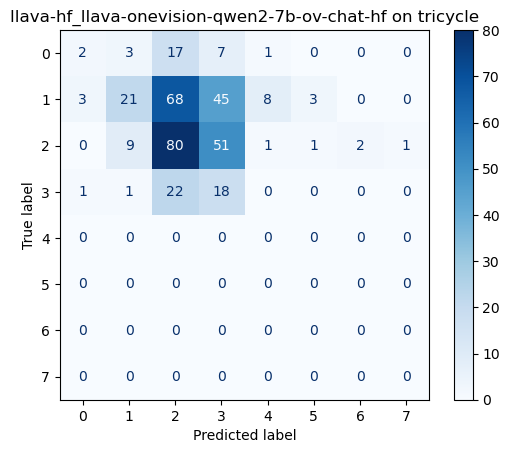

Evaluating /pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/lmms-lab_LLaVA-Video-7B-Qwen2/answers/universal_descriptive_count_tricycle_16fps.csv
Evaluating /pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/lmms-lab_LLaVA-Video-7B-Qwen2/answers/universal_descriptive_count_tricycle_16fps.csv
Batch job created with ID: batch_36e36ec8-f708-4194-8731-c3c5ac534211
Batch job status: validating...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying

/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/envs/cycle_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


{'score': 71, 'evaluated': 348, 'accuracy': 0.20402298850574713, 'abs_error': np.float64(0.0)}


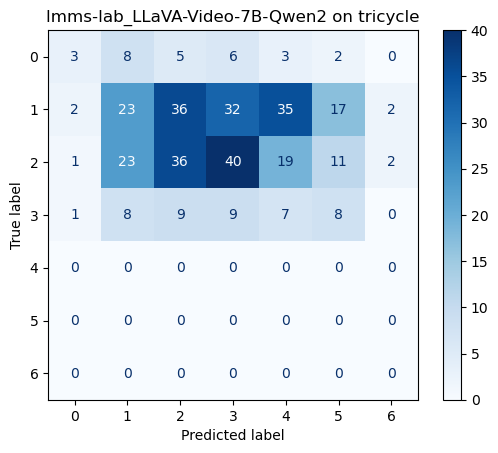

Evaluating /pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/OpenGVLab_InternVideo2_5_Chat_8B/answers/universal_descriptive_count_tricycle_16fps.csv
Evaluating /pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/OpenGVLab_InternVideo2_5_Chat_8B/answers/universal_descriptive_count_tricycle_16fps.csv
Batch job created with ID: batch_c7fe859c-924b-4e29-bba0-2b8777df24b1
Batch job status: validating...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...trying again in 5 seconds...
Batch job status: in_progress...

/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/envs/cycle_env/lib/python3.10/site-packages/sklearn/metrics/_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


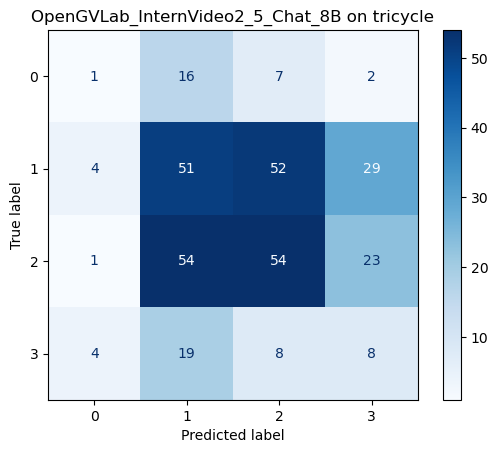

In [7]:
prompt_path = "/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/assets/prompts/vqa_prompt_counting.txt"

model_paths= [
"/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/llava-hf_llava-onevision-qwen2-7b-ov-chat-hf",
"/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/lmms-lab_LLaVA-Video-7B-Qwen2",
"/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/OpenGVLab_InternVideo2_5_Chat_8B",
# "/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/gemini-2.0-flash"
]

# for fps in [2,4,8,16]:
for fps in [16]:

    # for dataset in ["unicycle", "bicycle"]:#,"tricycle"]:
    for dataset in ["tricycle"]:
        metric_file ="universal_descriptive_count_{}_{}fps.csv".format(dataset, fps)
        
        with open(prompt_path, 'r') as f:
            lines = f.readlines()
            judge_prompt = ''.join(lines)
            print(judge_prompt)

        for model_path in model_paths:
            answer_csv = Path(model_path,"answers", metric_file)
            print("Evaluating", answer_csv)
            
            results, requests = query_judge_batched(answer_csv, judge_prompt)
            metrics, cm = compute_count_metrics(results)
            
            # save metrics to json file
            metrics_file = Path(model_path,"metrics", metric_file.replace(".csv", "_metrics.json"))
            Path(model_path, "metrics").mkdir(parents=True, exist_ok=True)

            with open(metrics_file, 'w') as f:
                json.dump(metrics, f, indent=4)
            print(metrics)

            # save confusion matrix to json file
                #save confusion matrix to file

            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            disp.plot(cmap=plt.cm.Blues)
            title= model_path.split("/")[-1]
            plt.title(f"{title} on {dataset}")
            #make sure the confusion directory exists
            Path(model_path, "confusion").mkdir(parents=True, exist_ok=True)
            plt.savefig(Path(model_path,"confusion", metric_file.replace(".csv", "_cm.png")))
            plt.show()
        



In [5]:
import numpy as np
idx = np.random.randint(0, len(requests))
print(idx)
print("REQUEST")
print(requests[idx]['body']['messages'][1]['content'])
print("--------------")
print("RESPONSE")
print(results[idx]['response']['body']['choices']['message']['content'])


206
REQUEST
Hey, can you judge this prediction for my visual question answering dataset? The question is about counting objects with certain properties and the answer is a numbers. 

Tell me if the model predicted the correct number. Give a score of 1 if the model predicted the groundtruth and 0 if the number is not the same as the groundtruth. Also extract the number as an integer.


return a json object with the following format:
{
    "prediction": "There is one cycling object and one linearly moving object.",
    "prediction_integer":"2"
    "groundtruth": "2",
    "score": 1
}

Prediction:
One object, the green cone, exhibits linear motion.

GT:
2

--------------
RESPONSE
Here is the evaluation result:

{
    "prediction": "One object, the green cone, exhibits linear motion.",
    "prediction_integer": 1,
    "groundtruth": 2,
    "score": 0
}

Let me explain:

* The model's prediction is "One object, the green cone, exhibits linear motion.", which implies that the model is counti

# plotting

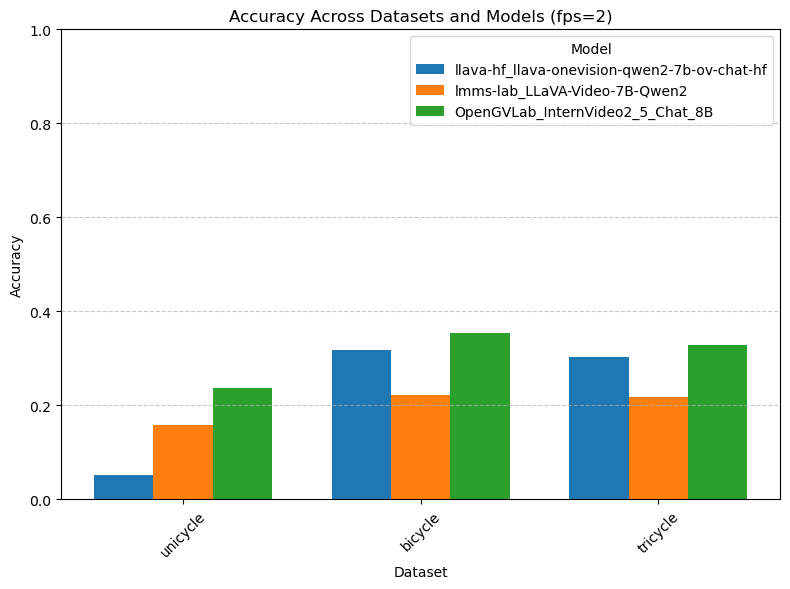

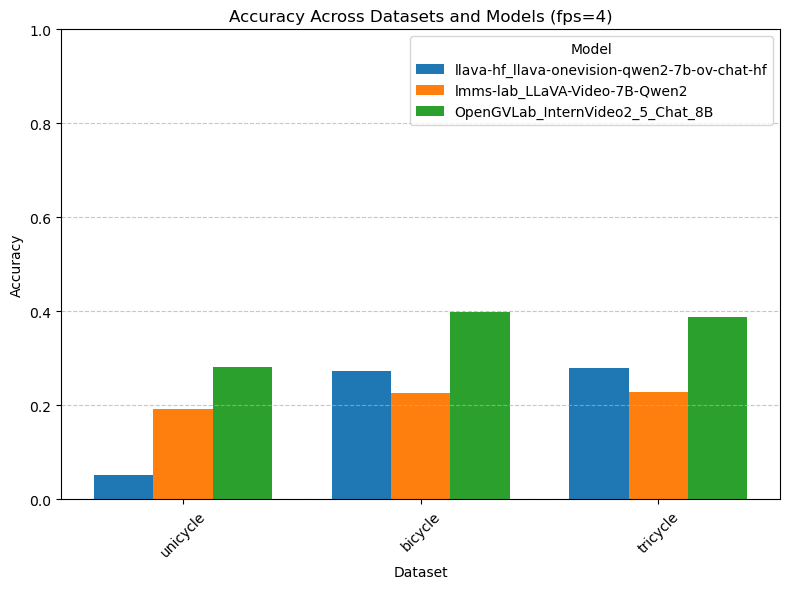

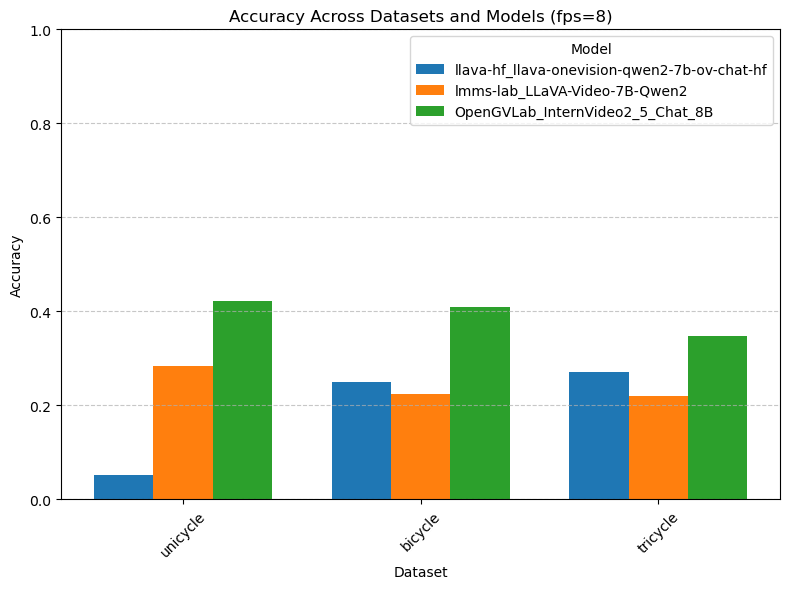

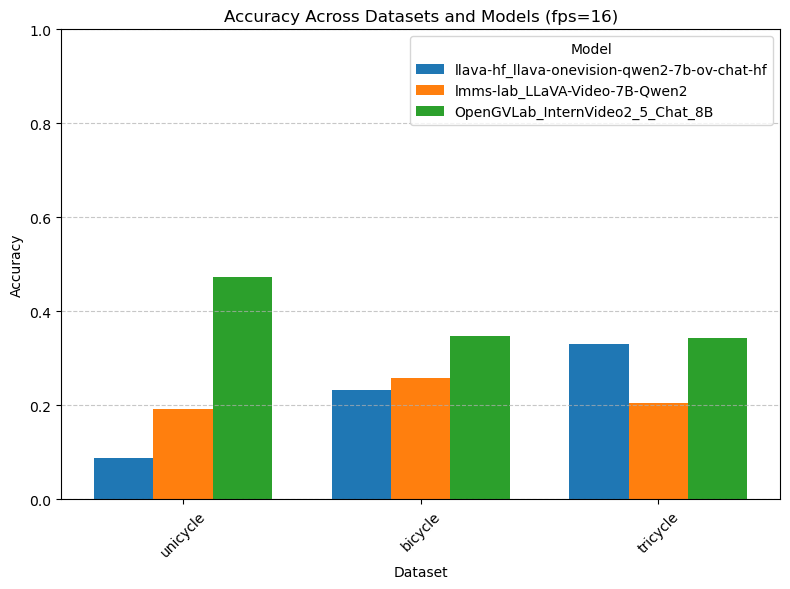

In [8]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
# Define paths and datasets
paths = [
    "/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/llava-hf_llava-onevision-qwen2-7b-ov-chat-hf/metrics",
    "/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/lmms-lab_LLaVA-Video-7B-Qwen2/metrics",
    "/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/OpenGVLab_InternVideo2_5_Chat_8B/metrics",
]

datasets = ["unicycle", "bicycle", "tricycle"]

# Initialize a DataFrame to store metrics

for fps in [2, 4, 8, 16]:

    data = []

    # Load metrics from JSON files
    for path in paths:
        model_name = Path(path).parents[0].name
        for dataset in datasets:
            metrics_file = Path(path, f"universal_descriptive_count_{dataset}_{fps}fps_metrics.json")
            if os.path.exists(metrics_file):
                with open(metrics_file, 'r') as f:
                    metrics = json.load(f)
                    metrics['model'] = model_name
                    metrics['dataset'] = dataset
                    data.append(metrics)
            else:
                print(f"Metrics file not found: {metrics_file}")
    # Convert data to a DataFrame
    df = pd.DataFrame(data)
    # print(df)

    # Example: Assume metrics contain fields like 'accuracy'
    # You can modify this based on the actual structure of your metrics.json files
    metrics_to_plot = ['accuracy']

    # Plot metrics for each model as bar plots
    for metric in metrics_to_plot:
        plt.figure(figsize=(8,6))
        width = 0.25  # Width of the bars
        x_labels = df['dataset'].unique()
        x = range(len(x_labels))
        
        for i, model in enumerate(df['model'].unique()):
            subset = df[df['model'] == model]
            values = [subset[subset['dataset'] == dataset][metric].values[0] if not subset[subset['dataset'] == dataset].empty else 0 for dataset in x_labels]
            plt.bar([p + i * width for p in x], values, width=width, label=model)
        
        plt.title(f'{metric.capitalize()} Across Datasets and Models (fps={fps})')
        plt.xlabel('Dataset')
        plt.ylabel(metric.capitalize())
        #set y labelt to max 1
        plt.ylim(0, 1)
        plt.xticks([p + width for p in x], x_labels, rotation=45)
        plt.legend(title='Model')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()

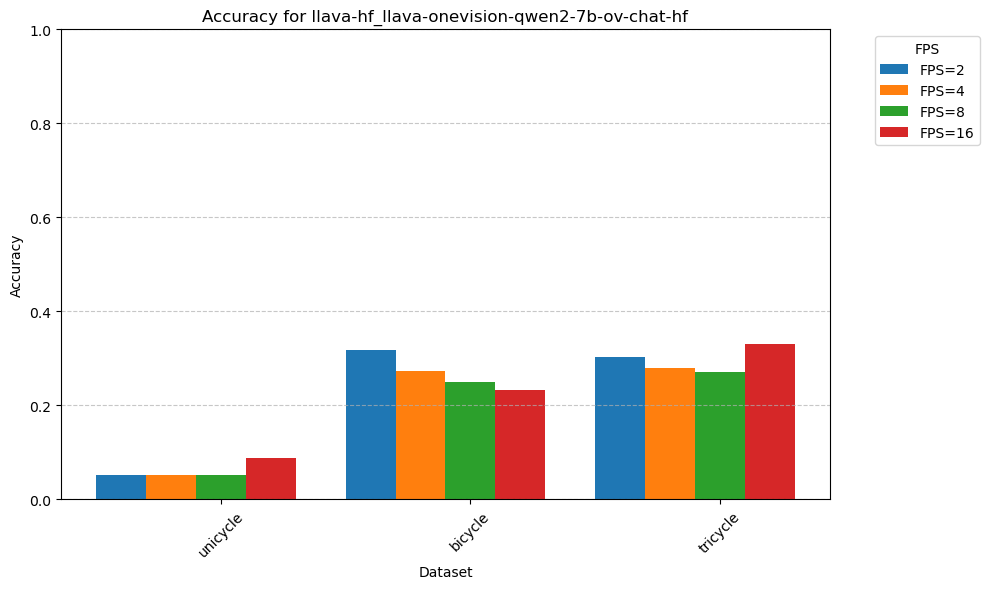

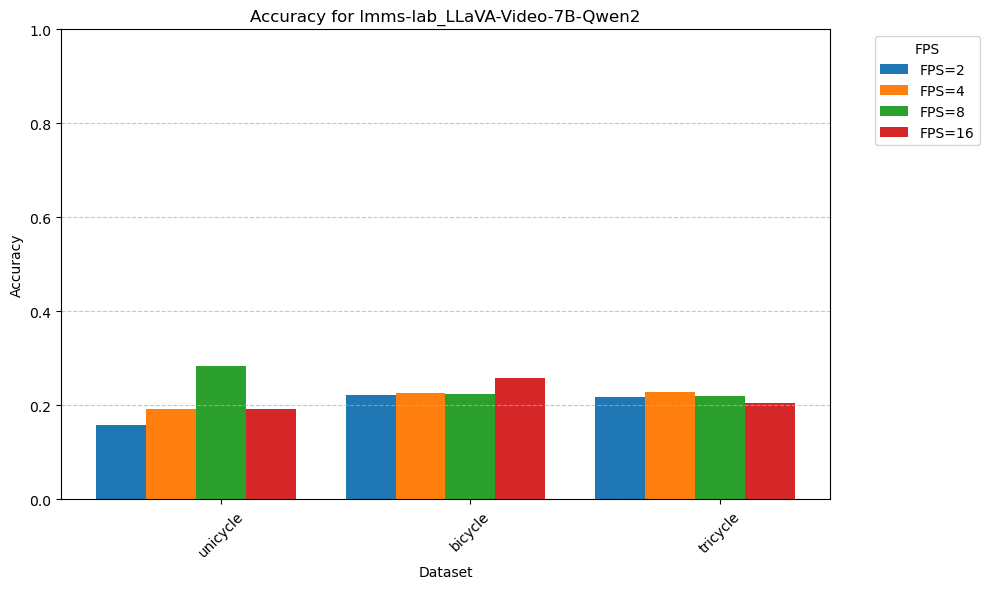

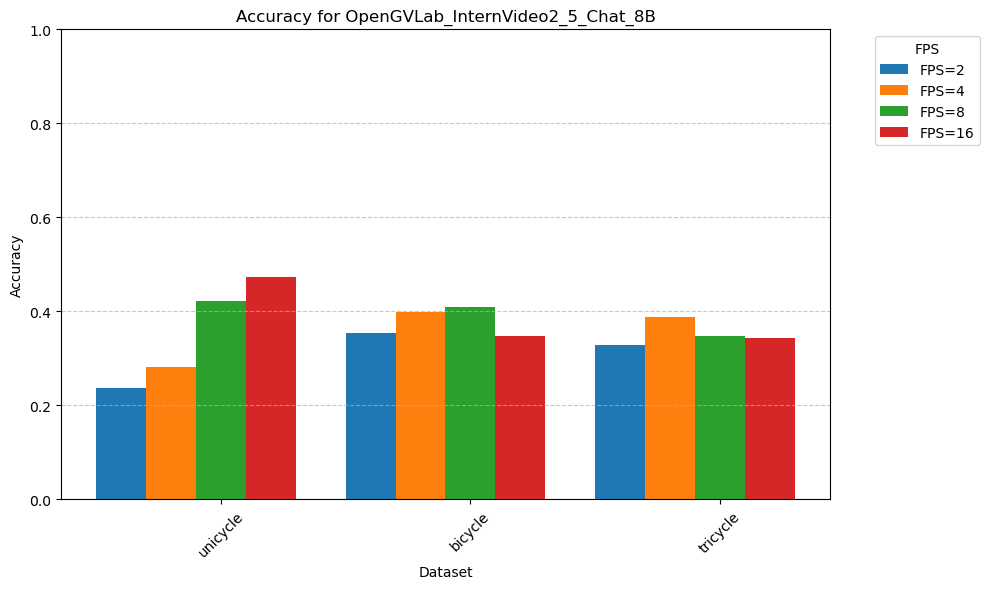

In [10]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path

# Define paths and datasets
paths = [
    "/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/llava-hf_llava-onevision-qwen2-7b-ov-chat-hf/metrics",
    "/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/lmms-lab_LLaVA-Video-7B-Qwen2/metrics",
    "/pfss/mlde/workspaces/mlde_wsp_Multimodal_on_42/CycliST/Cyclist/output/eval/OpenGVLab_InternVideo2_5_Chat_8B/metrics",
]

datasets = ["unicycle", "bicycle", "tricycle"]  # "tricycle"]
# datasets = [ "tricycle"]  # "tricycle"]

# Initialize a DataFrame to store metrics
data = []

# Load metrics from JSON files
for fps in [2, 4, 8, 16]:
    for path in paths:
        model_name = Path(path).parents[0].name
        for dataset in datasets:
            # if dataset == "tricycle" and fps == 16:
            #     continue
            metrics_file = Path(path, f"universal_descriptive_count_{dataset}_{fps}fps_metrics.json")
            if os.path.exists(metrics_file):
                with open(metrics_file, 'r') as f:
                    metrics = json.load(f)
                    metrics['model'] = model_name
                    metrics['dataset'] = dataset
                    metrics['fps'] = fps
                    data.append(metrics)
            else:
                print(f"Metrics file not found: {metrics_file}")

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Example: Assume metrics contain fields like 'accuracy'
# You can modify this based on the actual structure of your metrics.json files
metrics_to_plot = ['accuracy']

# Plot metrics for each model in separate plots
for metric in metrics_to_plot:
    for model in df['model'].unique():
        plt.figure(figsize=(10, 6))
        width = 0.2  # Width of the bars
        x_labels = df['dataset'].unique()
        x = range(len(x_labels))
        
        subset = df[df['model'] == model]
        for j, fps in enumerate([2, 4, 8, 16]):
            fps_subset = subset[subset['fps'] == fps]
            values = [fps_subset[fps_subset['dataset'] == dataset][metric].values[0] if not fps_subset[fps_subset['dataset'] == dataset].empty else 0 for dataset in x_labels]
            plt.bar([p + j * width for p in x], values, width=width, label=f"FPS={fps}")
        
        plt.title(f'{metric.capitalize()} for {model}')
        plt.xlabel('Dataset')
        plt.ylabel(metric.capitalize())
        plt.ylim(0, 1)
        plt.xticks([p + (len([2, 4, 8, 16]) * width) / 2 for p in x], x_labels, rotation=45)
        plt.legend(title='FPS', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()